In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
test_images.shape

(10000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000,28,28,1))

In [12]:
#scaling the data
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
train_images[0].shape

(28, 28, 1)

In [17]:
# Build the model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10,activation="sigmoid"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 32)        9248      
                                                                 
 batch_normalization_3 (Bat  (None, 23, 23, 32)        128       
 chNormalization)                                                
                                                      

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
#Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 16s 5ms/step - loss: 0.2090 - accuracy: 0.9446 - val_loss: 0.0696 - val_accuracy: 0.9803
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0835 - accuracy: 0.9777 - val_loss: 0.0677 - val_accuracy: 0.9798
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0599 - accuracy: 0.9831 - val_loss: 0.0763 - val_accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0505 - accuracy: 0.9858 - val_loss: 0.0431 - val_accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0405 - accuracy: 0.9890 - val_loss: 0.0443 - val_accuracy: 0.9877


In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0443 - accuracy: 0.9877
Test accuracy: 0.9876999855041504


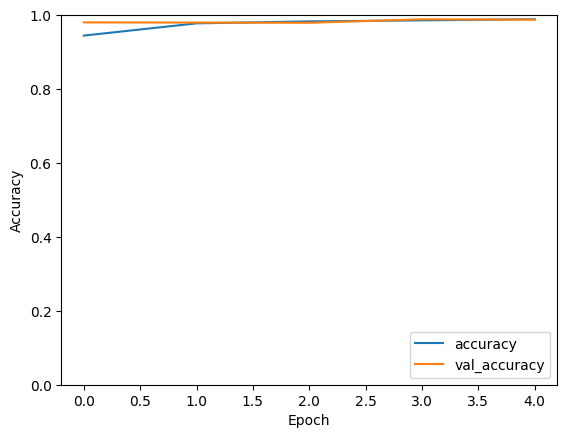

In [22]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()